In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_rows', 25)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)
import spacy
nlp = spacy.load('en_core_web_md')
import random
from simpleneighbors import SimpleNeighbors

In [5]:
#pip install simpleneighbors
#!pip install spacy
#!python -m spacy download en_core_web_md
#!conda install -y -c conda-forge python-annoy 

In [6]:
lookup = SimpleNeighbors(300)

In [7]:
f=open("A-Vindication-ofthe Rightsof-Woman-byMary-Wollstonecraft.txt","r",encoding='utf-8')

In [8]:
#frost_doc = nlp(open, encoding='utf-8' ("Pride-and-Prejudice.txt").read())

In [9]:
frost_doc = nlp(f.read())

In [10]:
chunk_lookup = SimpleNeighbors(300)
for chunk in frost_doc.noun_chunks:
    chunk_lookup.add_one(chunk.text.replace("\n", " "), chunk.vector)
chunk_lookup.build()

In [11]:
adj_lookup = SimpleNeighbors(300)
for word in frost_doc:
    if word.tag_ == 'JJ' and word.text not in adj_lookup.corpus:
        adj_lookup.add_one(word.text, word.vector)
adj_lookup.build()

output = []
for word in frost_doc:
    if word.is_alpha and word.pos_ == 'NOUN':
        new_word = random.choice(chunk_lookup.nearest(word.vector, 8))
        output.append(new_word)
    elif word.is_alpha and word.tag_ == 'JJ':
        new_word = random.choice(adj_lookup.nearest(word.vector, 8))
        output.append(new_word)
    else:
        output.append(word.text)
    output.append(word.whitespace_)
print(''.join(output))

In [12]:
sentence_lookup = SimpleNeighbors(300)
for sent in frost_doc.sents:
    sentence_lookup.add_one(sent.text.replace("\n", " "), sent.vector)
sentence_lookup.build()

In [13]:
sentence_lookup.nearest(nlp("woman").vector)

['Hapless woman!',
 '--for truly she is an honourable woman!  ',
 "She tells a story of a young man engaged by his father's express desire to a girl of fortune.  ",
 'And woman either slave or queen, ',
 '--is woman in a natural state?  ',
 'A man of sense can only love such a woman on account of her sex, and respect her, because she is a trusty servant.  ',
 'But the sexual weakness that makes woman depend on man for a subsistence, produces a kind of cattish affection, which leads a wife to purr about her husband, as she would about any man who fed and caressed her.  ',
 'The married woman, on the contrary, breaks a most sacred engagement, and becomes a cruel mother when she is a false and faithless wife.  ',
 'In the mean time she had become the mother of a female child, whom she called Frances in commemoration of her early friendship.  ',
 "For when a woman in the lower rank of life makes her husband's and children's clothes, ",
 "To preserve personal beauty, woman's glory!",
 'Who 

In [14]:
sentence_lookup.nearest(nlp("man").vector)

['Respect for man, as man is the foundation of every noble sentiment.  ',
 "She tells a story of a young man engaged by his father's express desire to a girl of fortune.  ",
 'Let men prove this, and I shall grant that woman only exists for man.  ',
 'whom he hath seen, how can he love God?',
 '"He is the free man, whom TRUTH makes free!"  ',
 'He who loves not his brother',
 'Who made man the exclusive judge, if woman partake with him the gift of reason?  ',
 "these the virtues of man's helpmate.  ",
 'He shall speak for himself, for thus he makes nature address man. ',
 '"Certainly," says Lord Bacon, "man is of kin to the beasts by his body: and if he be not of kin to God by his spirit, he is a base and ignoble creature!"  ',
 '--for truly she is an honourable woman!  ',
 'In the society of his wife he is still alone, unless when the man is sunk in the brute.  ']

In [15]:
nouns = [item.text for item in frost_doc if item.pos_ == 'NOUN']
adjectives = [item.text for item in frost_doc if item.pos_ == 'ADJ']

In [16]:
for i in range(10):
    print("A woman and her " + random.choice(adjectives) + " " + random.choice(nouns))

A woman and her fearful man
A woman and her plain arguments
A woman and her proper character
A woman and her superior contrary
A woman and her True construction
A woman and her innocent majesty
A woman and her envious behaviour
A woman and her slavish springtide
A woman and her contemptible choice
A woman and her gloomy affection


In [17]:
for item in frost_doc.ents:
    print(item)

Gutenberg Etext
A Vindication of the Rights of Woman
2
Mary Wollstonecraft
1971
Hundreds
Gutenberg
Etexts
The Project Gutenberg Literary Archive Foundation
501(c)(3
EIN
64
12/12/00
Colorado
Connecticut
Idaho
Indiana
Iowa
Kentucky
Louisiana
Massachusetts
Montana
Nevada
Oklahoma
South Carolina
South Dakota
Texas
Vermont
Wyoming
Gutenberg Literary Archive Foundation
PMB
University Ave
Oxford
MS 38655-4109
A Vindication of the Rights of Woman

Vindication of the Rights of Women
Mary Wollstonecraft
Godwin
Release Date: September, 2002
Etext #3420
about one year ahead
first
10
English
Gutenberg Etext
A Vindication of the Rights of Woman

3420.txt
Amy E Zelmer
Col Choat
Sue Asscher
Gutenberg Etexts
the United States
one year
years
midnight
the last day of the month
Gutenberg Etexts
Midnight
the last day of the stated month
Etext
the Project Gutenberg Newsletter
99
98
97
96
95
94
93
92
91
90
first
five
Gutenberg
one
about two million dollars
each hour
fifty hours

one hundred million
one dolla

In [18]:
for item in frost_doc.ents:
    print(item.text, item.label_)

Gutenberg Etext PERSON
A Vindication of the Rights of Woman WORK_OF_ART
2 MONEY
Mary Wollstonecraft PERSON
1971 DATE
Hundreds CARDINAL
Gutenberg PERSON
Etexts WORK_OF_ART
The Project Gutenberg Literary Archive Foundation ORG
501(c)(3 CARDINAL
EIN ORG
64 CARDINAL
12/12/00 CARDINAL
Colorado GPE
Connecticut GPE
Idaho GPE
Indiana GPE
Iowa GPE
Kentucky GPE
Louisiana GPE
Massachusetts GPE
Montana GPE
Nevada GPE
Oklahoma GPE
South Carolina GPE
South Dakota GPE
Texas GPE
Vermont GPE
Wyoming GPE
Gutenberg Literary Archive Foundation ORG
PMB ORG
University Ave GPE
Oxford ORG
MS 38655-4109 ORG
A Vindication of the Rights of Woman
 WORK_OF_ART
Vindication of the Rights of Women WORK_OF_ART
Mary Wollstonecraft PERSON
Godwin PERSON
Release Date: September, 2002 WORK_OF_ART
Etext #3420 MONEY
about one year ahead DATE
first ORDINAL
10 CARDINAL
English LANGUAGE
Gutenberg Etext PERSON
A Vindication of the Rights of Woman
 WORK_OF_ART
3420.txt ORDINAL
Amy E Zelmer PERSON
Col Choat PERSON
Sue Asscher PERS

In [19]:
from collections import Counter

In [20]:
noun_counts = Counter([item.text for item in frost_doc if item.pos_ == 'NOUN'])

In [21]:
top_ten_nouns = [item[0] for item in noun_counts.most_common(20)]
print(", ".join(top_ten_nouns))

women, man, men, reason, mind, woman, virtue, life, character, nature, sex, children, love, heart, understanding, respect, affection, world, education, power


In [22]:
subject_counts = Counter([item.text for item in frost_doc if item.dep_ == 'nsubj'])
top_ten_subjects = [item[0] for item in subject_counts.most_common(10)]
print(", ".join(top_ten_subjects))

I, they, it, who, which, that, he, she, women, we


In [23]:
entity_counts = Counter([item.text for item in frost_doc.ents])
top_ten_entities = [item[0] for item in entity_counts.most_common(10)]
print(", ".join(top_ten_entities))

one, first, Rousseau, two, half, French, only
, Gregory, France, daily


In [24]:
unique_words = list(set([item.text for item in frost_doc if item.is_alpha]))

In [25]:
[item for item in sorted(unique_words, key=lambda x: nlp.vocab[x].prob)][:15]

['concealing',
 'sending',
 'mortification',
 'Imlay',
 'nurtured',
 'judicious',
 'barbarians',
 'bordering',
 'Pages',
 'nativities',
 'perhaps',
 'labours',
 'broadest',
 'pole',
 'intimate']

In [26]:
from collections import Counter

In [27]:
word_counts = Counter([item.text for item in frost_doc if item.is_alpha])

In [28]:
word_counts

Counter({'Project': 29,
         'Gutenberg': 24,
         'Etext': 7,
         'of': 3743,
         'A': 81,
         'Vindication': 5,
         'the': 4857,
         'Rights': 6,
         'Woman': 9,
         'in': 1219,
         'our': 99,
         'series': 1,
         'by': 822,
         'Mary': 11,
         'Wollstonecraft': 3,
         'Copyright': 1,
         'laws': 17,
         'are': 675,
         'changing': 2,
         'all': 242,
         'over': 83,
         'world': 100,
         'be': 1053,
         'sure': 8,
         'to': 3264,
         'check': 5,
         'for': 773,
         'your': 65,
         'country': 22,
         'before': 82,
         'redistributing': 1,
         'these': 120,
         'files': 5,
         'Please': 7,
         'take': 59,
         'a': 1797,
         'look': 20,
         'at': 212,
         'important': 20,
         'information': 7,
         'this': 393,
         'header': 1,
         'We': 20,
         'encourage': 2,
         'you': 1

In [29]:
word_counts['woman']

194

In [30]:
word_counts['women']

412

In [31]:
word_counts['girl']

15

In [32]:
word_counts['girls']

38

In [33]:
word_counts['man']

309

In [34]:
word_counts['men']

275

In [35]:
word_counts.most_common(10)

[('the', 4857),
 ('of', 3743),
 ('to', 3264),
 ('and', 2407),
 ('a', 1797),
 ('that', 1359),
 ('in', 1219),
 ('is', 1176),
 ('be', 1053),
 ('not', 884)]

In [36]:
top_ten_words = [item[0] for item in word_counts.most_common(10)]
print(", ".join(top_ten_words))

the, of, to, and, a, that, in, is, be, not


Here's a list of a few dependency relations and what they mean. ([A more complete list can be found here.](http://www.mathcs.emory.edu/~choi/doc/clear-dependency-2012.pdf))

* `nsubj`: this word's head is a verb, and this word is itself the subject of the verb
* `nsubjpass`: same as above, but for subjects in sentences in the passive voice
* `dobj`: this word's head is a verb, and this word is itself the direct object of the verb
* `iobj`: same as above, but indirect object
* `aux`: this word's head is a verb, and this word is an "auxiliary" verb (like "have", "will", "be")
* `attr`: this word's head is a copula (like "to be"), and this is the description attributed to the subject of the sentence (e.g., in "This product is a global brand", `brand` is dependent on `is` with the `attr` dependency relation)
* `det`: this word's head is a noun, and this word is a determiner of that noun (like "the," "this," etc.)
* `amod`: this word's head is a noun, and this word is an adjective describing that noun
* `prep`: this word is a preposition that modifies its head
* `pobj`: this word is a dependent (object) of a preposition

In [37]:
def flatten_subtree(st):
    return ''.join([w.text_with_ws for w in list(st)]).strip()


In [38]:
prep_phrases = []
for word in frost_doc:
    if word.dep_ == 'prep':
        prep_phrases.append(flatten_subtree(word.subtree))

In [39]:
prep_phrases

['of A Vindication of the Rights of Woman',
 'of the Rights of Woman',
 'of Woman',
 'in our series',
 'all over the world',
 'for your country',
 'before redistributing these files',
 'at the important information in this header',
 'in this header',
 'on your own disk',
 'for the next readers',
 'without written permission',
 'with the information they\nneed about what they can legally do with the texts',
 'about what they can legally do with the texts',
 'with the texts',
 'To The World of Free Plain Vanilla Electronic Texts',
 'of Free Plain Vanilla Electronic Texts',
 'By Both Humans and By Computers',
 'Since 1971',
 'of Volunteers and Donations',
 'on contacting Project Gutenberg to get Etexts',
 'with EIN [Employee Identification Number] 64-6221541',
 'As of 12/12/00 contributions',
 'of 12/12/00 contributions',
 'from people',
 'in:\nColorado, Connecticut, Idaho, Indiana, Iowa,\nKentucky, Louisiana, Massachusetts, Montana,\nNevada, Oklahoma, South Carolina, South Dakota,\nTexas

In [40]:
prep_phrases = []
for word in frost_doc:
    if word.dep_ == 'pobj':
        prep_phrases.append(flatten_subtree(word.subtree))

In [41]:
prep_phrases

['A Vindication of the Rights of Woman',
 'the Rights of Woman',
 'Woman',
 'our series',
 'Mary Wollstonecraft',
 'the world',
 'your country',
 'the important information in this header',
 'this header',
 'your own disk',
 'the next readers',
 'written permission',
 'the information they\nneed about what they can legally do with the texts',
 'the texts',
 'The World of Free Plain Vanilla Electronic Texts',
 'Free Plain Vanilla Electronic Texts',
 'Both Humans and By Computers',
 'Computers',
 '1971',
 'Hundreds of Volunteers and Donations',
 'Volunteers and Donations',
 'EIN [Employee Identification Number] 64-6221541',
 '12/12/00 contributions',
 'people',
 'Colorado, Connecticut, Idaho, Indiana, Iowa,\nKentucky, Louisiana, Massachusetts, Montana,\nNevada, Oklahoma, South Carolina, South Dakota,\nTexas, Vermont, and Wyoming',
 'other states',
 'this list',
 'the additional states',
 'your state',
 'the Rights of Woman',
 'Woman',
 'the Rights of Women',
 'Women',
 'schedule',
 'A Vi

In [43]:
#pip install wordcloud


(-0.5, 399.5, 199.5, -0.5)

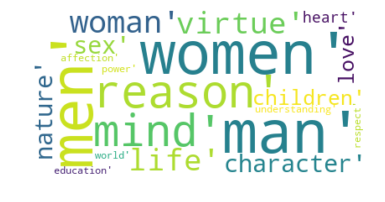

In [51]:
#importing the WordCload 
from wordcloud import WordCloud, STOPWORDS 
# Read the whole text.
text = top_ten_nouns
result = str(text) # trun words to strings
stop_words = ["It", "it",'it ', '  it', 'it ', 'that', 'them'] + list(STOPWORDS) # feedback from Poster session
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stop_words, max_font_size=70, min_font_size=10, max_words=40, background_color="white").generate(result)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud.png', dpi=300)

In [52]:
pip install scattertext

  Stored in directory: C:\Users\Rhied\AppData\Local\pip\Cache\wheels\37\db\d7\fe74f7cb8e5c3afed90fe6f4967c933a6f13d81ab6b3d3128c
Successfully built flashtext
Note: you may need to restart the kernel to use updated packages.


In [53]:
import scattertext as st
import spacy
from pprint import pprint

In [60]:
dog = wn.synset('dog.n.01')

In [61]:
graph = closure_graph(dog,
                      lambda s: s.hypernyms())

In [76]:
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [77]:
from nltk.corpus import wordnet as wn
import networkx as nx


def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name)
            for s1 in fn(s):
                graph.add_node(s1.name)
                graph.add_edge(s.name, s1.name)
                recurse(s1)

    recurse(synset)
    return graph

In [78]:
nx.graphviz_layout()

AttributeError: module 'networkx' has no attribute 'graphviz_layout'